In [1]:
import os
import pandas as pd
import json
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('animals_info.txt', 'r') as f:
    json_new = f.read()
animal_info = json.loads(json_new)
animal_info

[{'Kingdom': 'animalia',
  'Phylum': 'chordata',
  'Subphylum': 'vertebrata',
  'Class': 'mammalia',
  'Order': 'carnivora',
  'Suborder': 'caniformia',
  'Family': 'canidae',
  'Genus': 'canis',
  'SPECIES': 'Canis lupus arctos',
  'Population size': '200,000 ',
  'Life Span': '7-17 yrs',
  'TOP SPEED': '75 km/h',
  'WEIGHT': '32-70 kg',
  'HEIGHT': '63-79 cm',
  'LENGTH': '0.9-1.8 m',
  'Continents': ['North America'],
  'Climate': ['Polar/Tundra'],
  'Diet': ['carnivore'],
  'Lifestyle': ['Terrestrial, ',
   'Cursorial, ',
   'Altricial, ',
   'Pack hunters, ',
   'Pursuit predator, ',
   'Apex predator'],
  'MATING BEHAVIOR': 'Monogamy',
  'REPRODUCTION SEASON': 'January-March',
  'PREGNANCY DURATION': '61-63 days',
  'BABY CARRYING': '5-7 pups',
  'INDEPENDENT AGE': '6 months',
  'FEMALE NAME': 'bitch',
  'MALE NAME': 'dog',
  'BABY NAME': 'pup, whelp',
  'Trend': None,
  'Status': 'Least concern (LC)'},
 {'Kingdom': 'animalia',
  'Phylum': 'chordata',
  'Subphylum': 'vertebrata',

#### Checking continents values

##### Each continent has individual column:

    1. Africa
    2. Antartica
    3. Asia
    4. Central America
    5. South America
    6. North America
    7. Europe
    8. Oceanina (including New-Zealand)
    9. All continents (for domestic animals)
    
    
Each columns will get the value 1 if the animal lives at this continent and 0 if not.

In [3]:
all_Continents = []

for animal in animal_info:
     for continent in animal['Continents']:
        all_Continents.append(continent)

all_Continents = set(all_Continents)
all_Continents

{'A',
 'Africa',
 'Antarctica',
 'Asia',
 'Central America',
 'Europe',
 'New Zealand',
 'North America',
 'Oceania',
 'South America',
 'l'}

##### Checking climates values



##### Each continent has individual column:

    1. Cold
    2. Dry/Desert
    3. Polar/Tundra
    4. Temerate
    5. Tropical
   
    
Each columns will get the value 1 if the animal lives at this climate and 0 if not.
    

In [4]:
all_climates = []

for animal in animal_info:
    try:
         for cli in animal['Climate']:
            all_climates.append(cli)
    except:
        continue
all_climates = set(all_climates)
all_climates

{'Cold', 'Dry/Desert', 'Polar/Tundra', 'Temperate', 'Tropical'}

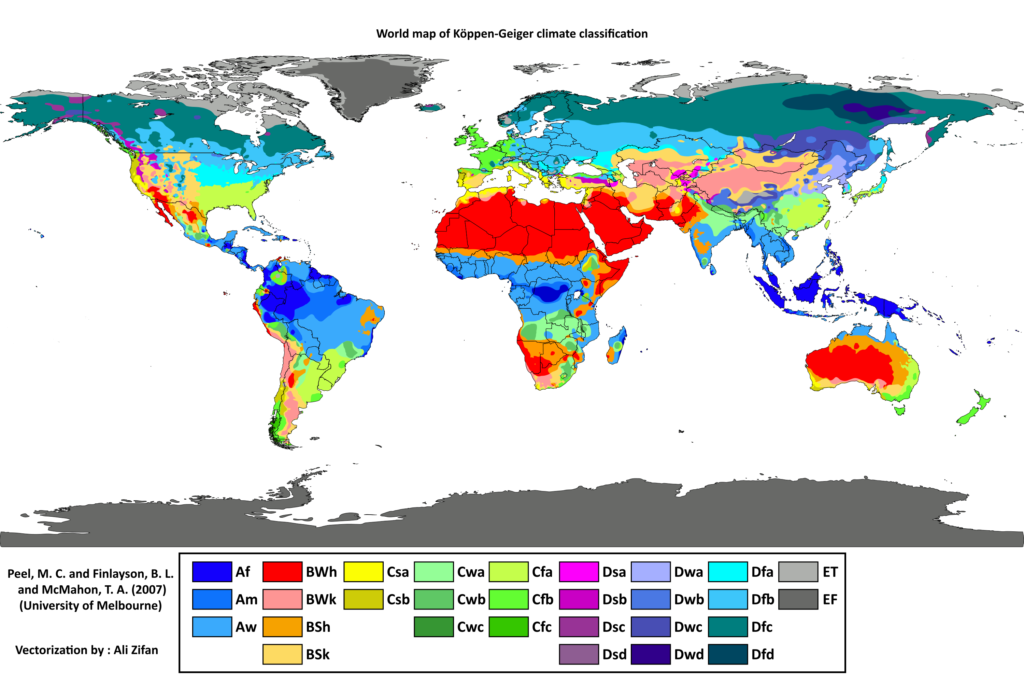

##### Checking lifestyle values (we decided not to include this data in our dataframe because it has too much values and every animal has different attributes)

In [5]:
all_LifeStyle = []

for animal in animal_info:
    try:
        for style in animal['Lifestyle']:
            all_LifeStyle.append(style)
    except:
        all_LifeStyle.append('Nan')

all_LifeStyle = set(all_LifeStyle)
len(all_LifeStyle)

61

#### Checking diets values

###### 0 - Omnivore, Gumivorous - eating everything
###### 1 - carnivore - meat eater (Carnivore,  Gumivorous, Hypercarnivore, Mesopredator, Piscivores, Predator)  
###### 2 - vegetarian (Folivore, Frugivore, Graminivore, Granivore, Gumivorous, herbivore, Nectarivore, Palynivore)
###### 3 - Insectivores, Vermivorous - insect eater
###### 4 - Scavenger - dead animals eater

##### We will create one categorical column

In [6]:
all_diets = []

for animal in animal_info:
    try:
        for diet in animal['Diet']:
            all_diets.append(diet)
    except:
        all_diets.append('Nan')

all_diets = set(all_diets)
all_diets

{'Nan',
 'carnivore',
 'folivore',
 'frugivore',
 'graminivore',
 'granivore',
 'gumivorous',
 'herbivore',
 'hypercarnivore',
 'insectivores',
 'mesopredator',
 'nectarivore',
 'omnivore',
 'palynivore',
 'piscivores',
 'predator',
 'scavenger',
 'vermivorous'}

0 - monogamy (Monogamy, Serial monogamy )
1 - polygamy (Polyandry, Polygamy, Polygynandry, Polygyny)

In [7]:
mating_behavior = []

for animal in animal_info:
    try:
        mating_behavior.append(animal['MATING BEHAVIOR'])
    except:
        mating_behavior.append('else')
    

mating_behavior = set(mating_behavior)
mating_behavior

{'Monogamy',
 'Monogamy, ',
 'Polyandry',
 'Polyandry, ',
 'Polygamy',
 'Polygamy, ',
 'Polygynandry',
 'Polygynandry, ',
 'Polygyny',
 'Polygyny, ',
 'Serial monogamy',
 'Serial monogamy, ',
 'else'}

## Trend: 

0 - Decreasing
1 - Increasing
2 - Stable
3 - None

In [8]:
trend_living = []

for animal in animal_info:
    try:
        trend_living.append(animal['Trend'])
    except:
        trend_living.append('else')
    

trend_living = set(trend_living)
trend_living

{'Decreasing', 'Increasing', None, 'Stable'}

0 - Least concern, Near Threatened
1 – Critically endangered, Endangerd, Vulnerable, Extinct, Extinct in the wild
Unknown – None, Not evaluated, Data deficient


In [9]:
status = []

for animal in animal_info:
    try:
        status.append(animal['Status'])
    except:
        status.append('else')
    

status = set(status)
status

{'Critically endangered (CR)',
 'Data deficient (DD)',
 'Endangered (EN)',
 'Extinct (EX)',
 'Extinct in the wild (EW)',
 'Least concern (LC)',
 'Near Threatened (NT)',
 None,
 'Not evaluated (NE)',
 'Vulnerable (VU)'}

In [10]:
with open('nocturnal_animals.txt', 'r') as f:
    nocturnal_animals = f.read()
nocturnal_animals = nocturnal_animals.split("\n")

In [11]:
with open('social_animals.txt', 'r') as f:
    social_animals = f.read()
social_animals = social_animals.split("\n")

In [12]:
class_col = []
order = []
family = []
species = []

population_size = []
top_speed = []
length = []
life_span = []
weight = []

africa = []
antarctica = []
asia = []
central_america = []
europe = []
north_america = []
oceania = [] #includs New-Zealand
south_america = []

cold = []
dry_desert = []
polar_tundra = []
temperate = []
tropical = []

diet = []
mating_behavior = []
incubation_period = []
baby_carrying = []
independent_age = []

trend = []
population_status = []

social = []
nocturnal = []

In [13]:
carnivores = ['carnivore', 'hypercarnivore', 'mesopredator', 'piscivores', 'predator']
vegetarians = ['folivore', 'frugivore', 'graminivore', 'granivore', 'herbivore', 'nectarivore', 'palynivore']
insect_eaters = ['insectivores', 'vermivorous']
all_eaters = ['omnivore', 'gumivorous']

monogamy_animals = ['Monogamy', 'Monogamy, ', 'Serial monogamy', 'Serial monogamy, ']
polygamy_animals = ['Polyandry', 'Polyandry, ', 'Polygamy', 'Polygamy, ', 
                    'Polygynandry', 'Polygynandry, ', 'Polygyny', 'Polygyny, ']

save_status = ['Least concern (LC)', 'Near Threatened (NT)']
not_save_status = ['Critically endangered (CR)', 'Endangered (EN)', 'Vulnerable (VU)', 
                   'Extinct (EX)', 'Extinct in the wild (EW)']
unknown_status = [None, 'Not evaluated (NE)', 'Data deficient (DD)']

In [14]:
for animal in animal_info:
    
    """ creating general information columns """
    
    class_col.append(animal['Class'])
    order.append(animal['Order'])
    family.append(animal['Family'])
    species.append(animal['SPECIES'])
    
    
    
    """ Social Animals """

    if animal['SPECIES'] in social_animals:
        social.append(1)
    else:
        social.append(0)

        
        
    """ Nocturnal Animals """

    if animal['SPECIES'] in nocturnal_animals:
        nocturnal.append(1)
    else:
        nocturnal.append(0)
    
    
    
    """ creating population size column """
    
    try:
        p_size = animal['Population size']
        if p_size == "Unknown":
            population_size.append(None)
        else:
            population_size.append(p_size)
    except:
        population_size.append(None)
     
    
    
    """ creating top speed column """
        
    try:
        speed_str = animal['TOP SPEED']
        template1 = r'^(\d*)' # create regular expression to extract the first speed value
        template2 = r'-(\d*)' # create regular expression to extract the second speed value
        value_min = re.findall(template1, speed_str)
        value_max = re.findall(template2, speed_str)
        if value_max:
            mean_speed = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_speed = float(value_min[0])
        top_speed.append(mean_speed) # calculate the mean speed value of specific animal
    except:
        top_speed.append(None)
        
    
    
    """ creating life span column """
        
    try:
        life_span_str = animal['Life Span']
        template1 = r'^(\d*)' # create regular expression to extract the first life span value
        template2 = r'-(\d*)' # create regular expression to extract the second life span value
        value_min = re.findall(template1, life_span_str)
        value_max = re.findall(template2, life_span_str)
        if value_max:
            mean_life_span = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_life_span = float(value_min[0])
        life_span.append(mean_life_span) # calculate the mean life span value of specific animal
    except:
        life_span.append(None)
        
        
        
    """ creating length column (cm format) """
        
    try:
        length_str = animal['LENGTH']
        template1 = r'^(\d*)' # create regular expression to extract the first life span value
        template2 = r'-(\d*)' # create regular expression to extract the second life span value
        measures = (re.findall(r'([a-z]+)$', length_str))[0]
        value_min = re.findall(template1, length_str)
        value_max = re.findall(template2, length_str)
        if value_max:
            mean_length = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_length = float(value_min[0])
        if measures:
            if measures == "mm":
                mean_length = mean_length / 10
            elif measures == "m":
                mean_length = mean_length * 100
            
        length.append(mean_length) # calculate the mean life span value of specific animal
    except:
        length.append(None)
        
        
    
    """ creating length column (kg format) """
        
    try:
        weight_str = animal['WEIGHT']
        template1 = r'^(\d*)' # create regular expression to extract the first life span value
        template2 = r'-(\d*)' # create regular expression to extract the second life span value
        measures = (re.findall(r'([a-z]+)$', weight_str))[0]
        value_min = re.findall(template1, weight_str)
        value_max = re.findall(template2, weight_str)
        if value_max:
            mean_weight = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_weight = float(value_min[0])
        if measures:
            if measures == "g":
                mean_weight = mean_weight / 1000
            elif measures == "t":
                mean_weight = mean_weight * 1000
            
        weight.append(mean_weight) # calculate the mean life span value of specific animal
        
    except:
        weight.append(None)
        
        
        
    """ continents """
   
    if ("Africa" in animal['Continents']) or ("All" in animal['Continents']):
        africa.append(1)
    else:
        africa.append(0)
        
    if ("Antarctica" in animal['Continents']) or ("All" in animal['Continents']):
        antarctica.append(1)
    else:
        antarctica.append(0)
        
    if ("Asia" in animal['Continents']) or ("All" in animal['Continents']):
        asia.append(1)
    else:
        asia.append(0)
        
    if ("Europe" in animal['Continents']) or ("All" in animal['Continents']):
        europe.append(1)
    else:
        europe.append(0)
        
    if ("Central_America" in animal['Continents']) or ("All" in animal['Continents']):
        central_america.append(1)
    else:
        central_america.append(0)
        
    if ("North_America" in animal['Continents']) or ("All" in animal['Continents']):
        north_america.append(1)
    else:
        north_america.append(0)
        
    if ("Oceania" in animal['Continents']) or ("New Zealand" in animal['Continents']) or ("All" in animal['Continents']):
        oceania.append(1)
    else:
        oceania.append(0)
        
    if ("South_America" in animal['Continents']) or ("All" in animal['Continents']):
        south_america.append(1)
    else:
        south_america.append(0)

    
    
    """ climates """
    
    try:
        if "Cold" in animal['Climate']:
            cold.append(1)
        else:
            cold.append(0)

        if "Dry/Desert" in animal['Climate']:
            dry_desert.append(1)
        else:
            dry_desert.append(0)

        if "Polar/Tundra" in animal['Climate']:
            polar_tundra.append(1)
        else:
            polar_tundra.append(0)

        if "Temperate" in animal['Climate']:
            temperate.append(1)
        else:
            temperate.append(0)

        if "Tropical" in animal['Climate']:
            tropical.append(1)
        else:
            tropical.append(0)
    except:
        cold.append(0)
        dry_desert.append(0)
        polar_tundra.append(0)
        temperate.append(0)
        tropical.append(0)
        
        
    
    """ diet (categorical column) """
    
    try:
        flag_c = 0
        flag_v = 0
        flag_i = 0
        flag_s = 0
        for diet_str in animal['Diet']:
            if diet_str in carnivores:
                flag_c = 1
            elif diet_str in vegetarians:
                flag_v = 1
            elif diet_str in insect_eaters:
                flag_i = 1
            elif diet_str == 'scavenger':
                flag_s = 1
        flags_sum = flag_c + flag_v + flag_i + flag_s
        if flags_sum > 1: # all eaters (more than one category)
            diet.append(0)
        else:
            if flag_c == 1:
                diet.append(1)
            elif flag_v == 1:
                diet.append(2)
            elif flag_i == 1:
                diet.append(3)
            elif flag_s == 1:
                diet.append(4)
            else:
                diet.append(0)
    except:
        diet.append(None)
    
    
    
    """ mating behavior (categorical column) """
    
    try:
        mate_str = animal['MATING BEHAVIOR']
        if mate_str in monogamy_animals:
            mating_behavior.append(0)
        elif mate_str in polygamy_animals:
            mating_behavior.append(1)
    except:
        mating_behavior.append(None)
        
    
    
    """ Incubation Period/Pregnancy Duration   """
    
    try:
        try:
            incubation_period_str = animal['INCUBATION PERIOD']
        except:
            incubation_period_str = animal['PREGNANCY DURATION']
        template1 = r'^(\d*)' 
        template2 = r'-(\d*)' 
        measures = (re.findall(r'([a-z]+)$', incubation_period_str))[0] # months/days/weeks
        value_min = re.findall(template1, incubation_period_str)
        value_max = re.findall(template2, incubation_period_str)
        if value_max:
            mean_period = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_period = float(value_min[0])
        if measures:
            if measures in "months":
                mean_period = mean_period * 30
            elif measures in "weeks":
                mean_period = mean_period * 7
        incubation_period.append(mean_period) 
    except:
        incubation_period.append(None)  
    
    
        
    """ Baby Carrying """
    try:
        baby_str = animal['BABY CARRYING']
        template1 = r'^(\d*)' # create regular expression to extract the first life span value
        template2 = r'-(\d*)' # create regular expression to extract the second life span value
        value_min = re.findall(template1, baby_str)
        value_max = re.findall(template2, baby_str)
        if value_max:
            mean_baby = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_baby = float(value_min[0])
        baby_carrying.append(mean_baby) # calculate the mean life span value of specific animal
    except:
        baby_carrying.append(None)
        
        
        """ independent age (convert to days)"""
    
    try:
        independent_age_str = animal['INDEPENDENT AGE']
        template1 = r'^(\d*)' 
        template2 = r'-(\d*)' 
        measures = (re.findall(r'([a-z]+)$', independent_age_str))[0] # months/days/weeks
        value_min = re.findall(template1, independent_age_str)
        value_max = re.findall(template2, independent_age_str)
        if value_max:
            mean_independent = (float(value_min[0]) + float(value_max[0]))/2
        else:
            mean_independent = float(value_min[0])
        if measures:
            if measures in "months":
                mean_independent = mean_independent * 30
            elif measures in "weeks":
                mean_independent = mean_independent * 7
            elif measures in "years":
                mean_independent = mean_independent * 365
        independent_age.append(mean_independent) 
    except:
        independent_age.append(None)
    
    
        
    """ Trend """ 
        
    animal_trend = animal['Trend']
    if animal_trend == "Decreasing":
        trend.append(0)
    elif animal_trend == "Increasing":
        trend.append(2)
    elif animal_trend == "Stable":
        trend.append(1)
    else:
        trend.append(None)
        
        
        
    """ status """
    
    status_str = animal['Status']
    if status_str in save_status:
        population_status.append(0)
    elif status_str in not_save_status:
        population_status.append(1)
    elif status_str in unknown_status:
        population_status.append(None)
        

In [15]:
animals_dict = {"Scientific Name": species, 
               "Class": class_col,
               "Order": order,
               "Family": family,
               "Population Size": population_size,
               "Trend": trend,
               "Status": population_status,
               "Life Span (years)": life_span,
               "Top Speed (km/h)": top_speed,
               "Length (cm)": length,
               "Weight (kg)": weight,
               "Is Social": social,
               "Is Nocturnal": nocturnal,
               "Diet": diet,
               "Mating Behavior": mating_behavior,
               "Incubation Period (days)": incubation_period,
               "Baby Carrying": baby_carrying,
               "Independent Age (days)": independent_age,
               "Africa": africa,
               "Antarctica": antarctica,
               "Asia": asia,
               "Europe": europe,
               "Oceania": oceania,
               "South America": south_america,
               "Central America": central_america,
               "North America": north_america,
               "Cold": cold,
               "Dry/Desert": dry_desert,
               "Polar/Tundra": polar_tundra,
               "Temperate": temperate,
               "Tropical": tropical}

In [16]:
animals_df = pd.DataFrame(animals_dict)

In [17]:
animals_df

,Scientific Name,Class,Order,Family,Population Size,Trend,Status,Life Span (years),Top Speed (km/h),Length (cm),...,Europe,Oceania,South America,Central America,North America,Cold,Dry/Desert,Polar/Tundra,Temperate,Tropical
0,Canis lupus arctos,mammalia,carnivora,canidae,"200,000",NaN,0.0,12.0,75.0,50.00,...,0,0,0,0,0,0,0,1,0,0
1,Vulpes lagopus,mammalia,carnivora,canidae,None,1.0,0.0,8.5,45.0,53.50,...,1,0,0,0,0,0,0,1,0,0
2,Tamiasciurus hudsonicus,mammalia,rodentia,sciuridae,None,1.0,0.0,7.5,22.0,32.50,...,0,0,0,0,0,1,1,1,1,0
3,Canis lupus,mammalia,carnivora,canidae,"400,000",1.0,0.0,15.0,75.0,132.50,...,1,0,0,0,0,1,1,1,1,0
4,Mustela erminea,mammalia,carnivora,mustelidae,None,1.0,0.0,6.5,NaN,24.75,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,Melanerpes erythrocephalus,aves,piciformes,picidae,1.2 mln,0.0,0.0,10.5,NaN,22.00,...,0,0,0,0,0,0,0,0,1,1
1585,Mniotilta varia,aves,passeriformes,parulidae,20 mln,0.0,0.0,11.0,NaN,12.00,...,0,0,0,0,0,1,0,0,1,1
1586,Leuconotopicus albolarvatus,aves,piciformes,picidae,"240,000",1.0,0.0,6.5,NaN,22.00,...,0,0,0,0,0,0,0,0,1,0
1587,Dryobates borealis,aves,piciformes,picidae,15-30 thou,0.0,0.0,14.0,NaN,20.50,...,0,0,0,0,0,0,0,0,1,0


In [18]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scientific Name           1589 non-null   object 
 1   Class                     1589 non-null   object 
 2   Order                     1589 non-null   object 
 3   Family                    1589 non-null   object 
 4   Population Size           695 non-null    object 
 5   Trend                     1291 non-null   float64
 6   Status                    1492 non-null   float64
 7   Life Span (years)         1525 non-null   float64
 8   Top Speed (km/h)          584 non-null    float64
 9   Length (cm)               1474 non-null   float64
 10  Weight (kg)               1447 non-null   float64
 11  Is Social                 1589 non-null   int64  
 12  Is Nocturnal              1589 non-null   int64  
 13  Diet                      1582 non-null   float64
 14  Mating B

In [19]:
animals_df.drop(labels=['Population Size', 'Top Speed (km/h)'], axis=1, inplace=True)

In [20]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scientific Name           1589 non-null   object 
 1   Class                     1589 non-null   object 
 2   Order                     1589 non-null   object 
 3   Family                    1589 non-null   object 
 4   Trend                     1291 non-null   float64
 5   Status                    1492 non-null   float64
 6   Life Span (years)         1525 non-null   float64
 7   Length (cm)               1474 non-null   float64
 8   Weight (kg)               1447 non-null   float64
 9   Is Social                 1589 non-null   int64  
 10  Is Nocturnal              1589 non-null   int64  
 11  Diet                      1582 non-null   float64
 12  Mating Behavior           1199 non-null   float64
 13  Incubation Period (days)  1460 non-null   float64
 14  Baby Car

In [22]:
animals_df.to_csv("animals first data.csv", index=False)